* workload: 
    * 3 hours

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import spacy
from spacy import tokenizer
from spacy.lang.en import English

In [7]:
proj_path = "/Users/steeve_laquitaine/desktop/CodeHub/intent/intent/"
train_data_path = proj_path + "data/01_raw/banking77/train.csv"
test_data_path = proj_path + "data/01_raw/banking77/test.csv"

In [8]:
train_data  = pd.read_csv(train_data_path)

In [9]:
# preview
train_data.head(5)

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


In [10]:
print('{} unique labels'.format(train_data.category.nunique()))
print(train_data.category.unique())

77 unique labels
['card_arrival' 'card_linking' 'exchange_rate'
 'card_payment_wrong_exchange_rate' 'extra_charge_on_statement'
 'pending_cash_withdrawal' 'fiat_currency_support'
 'card_delivery_estimate' 'automatic_top_up' 'card_not_working'
 'exchange_via_app' 'lost_or_stolen_card' 'age_limit' 'pin_blocked'
 'contactless_not_working' 'top_up_by_bank_transfer_charge'
 'pending_top_up' 'cancel_transfer' 'top_up_limits'
 'wrong_amount_of_cash_received' 'card_payment_fee_charged'
 'transfer_not_received_by_recipient' 'supported_cards_and_currencies'
 'getting_virtual_card' 'card_acceptance' 'top_up_reverted'
 'balance_not_updated_after_cheque_or_cash_deposit'
 'card_payment_not_recognised' 'edit_personal_details'
 'why_verify_identity' 'unable_to_verify_identity' 'get_physical_card'
 'visa_or_mastercard' 'topping_up_by_card' 'disposable_card_limits'
 'compromised_card' 'atm_support' 'direct_debit_payment_not_recognised'
 'passcode_forgotten' 'declined_cash_withdrawal' 'pending_card_payme

Took 0.24 secs


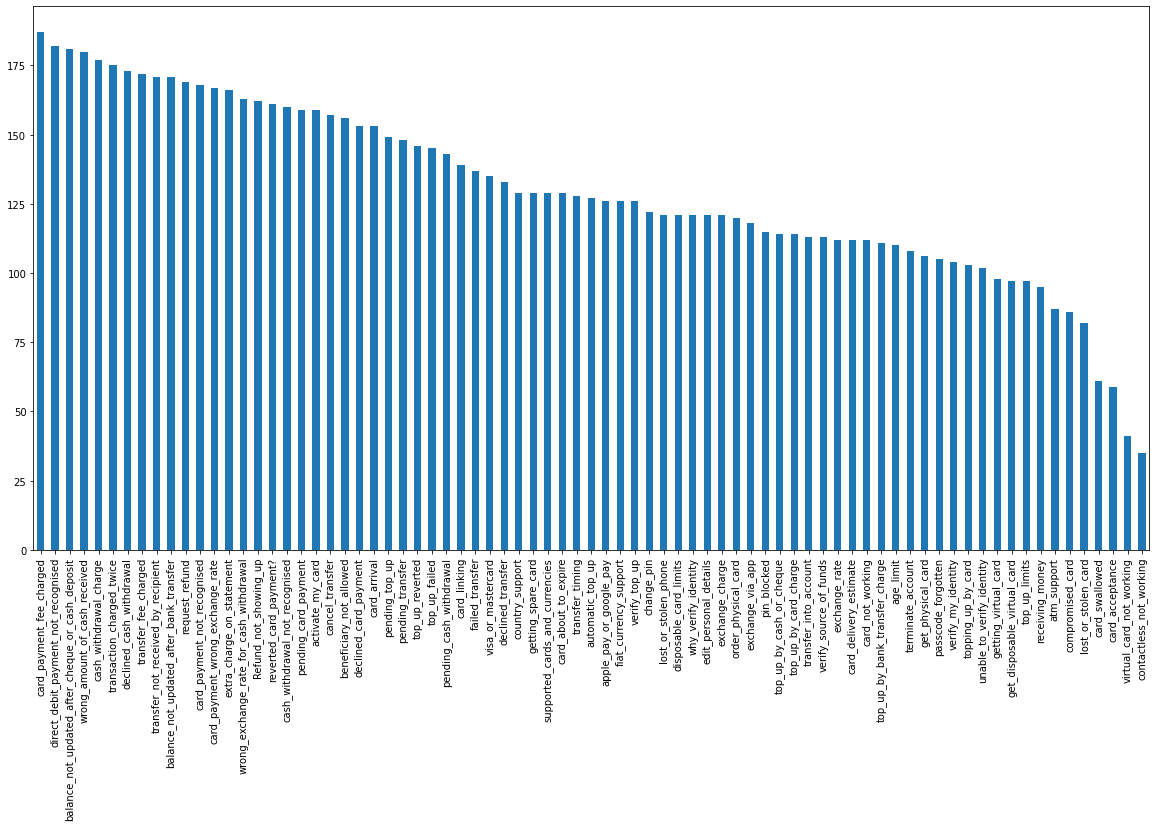

In [69]:
# train_data.plot.barh(y="category")
# train_data.category.hist()
tic = time.time()
plt.figure(figsize=(20,10))
train_data['category'].value_counts().plot(kind='bar');
print('Took {} secs'.format(np.round(time.time()-tic,2)))

In [92]:
# list labels sorted by occurrence frequency
train_data['category'].value_counts().index

Index(['card_payment_fee_charged', 'direct_debit_payment_not_recognised',
       'balance_not_updated_after_cheque_or_cash_deposit',
       'wrong_amount_of_cash_received', 'cash_withdrawal_charge',
       'transaction_charged_twice', 'declined_cash_withdrawal',
       'transfer_fee_charged', 'transfer_not_received_by_recipient',
       'balance_not_updated_after_bank_transfer', 'request_refund',
       'card_payment_not_recognised', 'card_payment_wrong_exchange_rate',
       'extra_charge_on_statement', 'wrong_exchange_rate_for_cash_withdrawal',
       'Refund_not_showing_up', 'reverted_card_payment?',
       'cash_withdrawal_not_recognised', 'pending_card_payment',
       'activate_my_card', 'cancel_transfer', 'beneficiary_not_allowed',
       'declined_card_payment', 'card_arrival', 'pending_top_up',
       'pending_transfer', 'top_up_reverted', 'top_up_failed',
       'pending_cash_withdrawal', 'card_linking', 'failed_transfer',
       'visa_or_mastercard', 'declined_transfer', 'co

In [130]:
# focus on the requests for the top label (most frequent)
top_label_data = train_data.text.loc[train_data["category"]=="card_payment_fee_charged"]

# explore its vocabulary

In [153]:
# convert data Series to one data String
data_string = " ".join(top_label_data.to_list())

In [187]:
# tokenize text
def tokenize_txt(data_string, tokenizer, English):
    tokenize = tokenizer.Tokenizer(English().vocab)
    tokens = tokenize(data_string)
    print("{} tokens".format(len(tokens)))
    return tokens

2619 tokens


In [188]:
tokens = tokenize_txt(data_string, tokenizer, English)    

2619 tokens


In [194]:
pd.DataFrame(list(tokens))

,0
0,There
1,was
2,a
3,fee
4,charged
...,...
2614,I
2615,find
2616,this
2617,information
